<a href="https://colab.research.google.com/github/HarryWallrus/CHEG_672_misc_work/blob/main/Workshop_3_SAF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading
---

Importing the necessary libraries and uploading the file, and then loading the dataset and displaying the first few rows.

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the dataset
file_name = "Lab 3 SAF Dataset.xlsx"  # Replace with your actual file name
df = pd.read_excel(file_name)

# Display the first few rows of the dataset
df.head()

Saving Lab 3 SAF Dataset.xlsx to Lab 3 SAF Dataset.xlsx


,C (%),H (%),N (%),O (%),S (%),VM (%),Ash (%),FC (%),Cel (%),Hem (%),Lig (%),Location,Plant capacity (kg/hr),MSP
0,53.041259,6.390897,0.871969,39.366227,0.329647,82.070081,4.884097,13.045822,37.260000,14.620000,31.680000,US,25000,0.64
1,52.846674,6.186584,0.436866,40.219842,0.310034,70.783562,12.000000,17.216438,31.300000,24.300000,14.100000,US,25000,0.63
2,40.020000,6.010000,0.880000,52.860000,0.230000,72.294705,10.020831,17.684464,35.000000,27.500000,10.000000,US,25000,0.69
3,45.739910,10.762332,7.036909,34.908589,1.552259,49.357766,42.020000,8.626970,35.000000,25.000000,26.500000,US,25000,0.85
4,44.480000,6.280000,8.210000,40.490000,0.540000,77.497780,6.472025,16.030195,22.775726,55.419525,2.955145,US,25000,1.20


In [ ]:
# Replace '/path/to/your/file.xlsx' with the actual file path
file_path = '/content/Lab 3 SAF Dataset.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

# Print the first few rows of the DataFrame to verify
print(df.head())

       C (%)      H (%)     N (%)      O (%)     S (%)     VM (%)    Ash (%)  \
0  53.041259   6.390897  0.871969  39.366227  0.329647  82.070081   4.884097   
1  52.846674   6.186584  0.436866  40.219842  0.310034  70.783562  12.000000   
2  40.020000   6.010000  0.880000  52.860000  0.230000  72.294705  10.020831   
3  45.739910  10.762332  7.036909  34.908589  1.552259  49.357766  42.020000   
4  44.480000   6.280000  8.210000  40.490000  0.540000  77.497780   6.472025   

      FC (%)    Cel (%)    Hem (%)    Lig (%) Location  \
0  13.045822  37.260000  14.620000  31.680000       US   
1  17.216438  31.300000  24.300000  14.100000       US   
2  17.684464  35.000000  27.500000  10.000000       US   
3   8.626970  35.000000  25.000000  26.500000       US   
4  16.030195  22.775726  55.419525   2.955145       US   

   Plant capacity (kg/hr)   MSP  
0                   25000  0.64  
1                   25000  0.63  
2                   25000  0.69  
3                   25000  0.85  


Get the number of rows and columns.

In [ ]:
# Get the number of rows and columns in the DataFrame
num_rows, num_cols = df.shape

# Print the results
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 186
Number of columns: 14


Listing the column names and the data type of each column.

In [ ]:
# Get the data types of each column
data_types = df.dtypes

# Print the results
print("Data types:\n")
print(data_types)

# Identify numeric columns (integer and float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (object)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("\nNumeric columns:", numeric_columns)
print("\nCategorical columns:", categorical_columns)

Data types:

C (%)                     float64
H (%)                     float64
N (%)                     float64
O (%)                     float64
S (%)                     float64
VM (%)                    float64
Ash (%)                   float64
FC (%)                    float64
Cel (%)                   float64
Hem (%)                   float64
Lig (%)                   float64
Location                   object
Plant capacity (kg/hr)      int64
MSP                       float64
dtype: object

Numeric columns: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)', 'Cel (%)', 'Hem (%)', 'Lig (%)', 'Plant capacity (kg/hr)', 'MSP']

Categorical columns: ['Location']


The data of the Plant capacity (kg/hr) column is meant to indicate the type of plant with respect to capacity, either 25000 or 50000. The column's values are considered as int64, so the code below will convert those values to objects for later one-hot encoding.

In [ ]:
# Change the datatype of the column
df['Plant capacity (kg/hr)'] = df['Plant capacity (kg/hr)'].astype('object')

print(df.dtypes)

C (%)                     float64
H (%)                     float64
N (%)                     float64
O (%)                     float64
S (%)                     float64
VM (%)                    float64
Ash (%)                   float64
FC (%)                    float64
Cel (%)                   float64
Hem (%)                   float64
Lig (%)                   float64
Location                   object
Plant capacity (kg/hr)     object
MSP                       float64
dtype: object


# Check for Missing or Duplicate Data
---

Check for missing data and displaying the number of missing values for each column (if any).

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing data
print("Columns with missing values:\n")
print(missing_values[missing_values > 0])

Columns with missing values:

Series([], dtype: int64)


result: there is no missing data

Identify any duplicate rows in the data and drop them, if any:

In [ ]:
# Check for duplicates in the entire dataset
duplicate_rows = df[df.duplicated()]

print(duplicate_rows)

        C (%)     H (%)     N (%)      O (%)  S (%)  VM (%)  Ash (%)  FC (%)  \
10   47.64903  6.174469  0.619478  45.557022    0.0   72.95     1.54   25.51   
41   47.64903  6.174469  0.619478  45.557022    0.0   72.95     1.54   25.51   
72   47.64903  6.174469  0.619478  45.557022    0.0   72.95     1.54   25.51   
103  47.64903  6.174469  0.619478  45.557022    0.0   72.95     1.54   25.51   
134  47.64903  6.174469  0.619478  45.557022    0.0   72.95     1.54   25.51   
165  47.64903  6.174469  0.619478  45.557022    0.0   72.95     1.54   25.51   

     Cel (%)  Hem (%)  Lig (%) Location Plant capacity (kg/hr)     MSP  
10     29.01    41.24     22.4       US                  25000  0.7500  
41     29.01    41.24     22.4       UK                  25000  0.8112  
72     29.01    41.24     22.4    China                  25000  0.4752  
103    29.01    41.24     22.4       US                  50000  1.0800  
134    29.01    41.24     22.4       UK                  50000  1.1232  
1

In [ ]:
# Check for duplicate rows before removal
num_duplicates_before = df.duplicated().sum()
print("Number of duplicate rows before removal:", num_duplicates_before)

# Remove duplicate rows
df = df.drop_duplicates()

# Check if duplicates were removed successfully
num_duplicates_after = df.duplicated().sum()
print("Number of duplicate rows after removal:", num_duplicates_after)

# Print the final DataFrame
print(df)

Number of duplicate rows before removal: 6
Number of duplicate rows after removal: 0
         C (%)      H (%)     N (%)      O (%)     S (%)     VM (%)  \
0    53.041259   6.390897  0.871969  39.366227  0.329647  82.070081   
1    52.846674   6.186584  0.436866  40.219842  0.310034  70.783562   
2    40.020000   6.010000  0.880000  52.860000  0.230000  72.294705   
3    45.739910  10.762332  7.036909  34.908589  1.552259  49.357766   
4    44.480000   6.280000  8.210000  40.490000  0.540000  77.497780   
..         ...        ...       ...        ...       ...        ...   
181  50.840673   5.904724  0.300240  42.934347  0.020016  85.300000   
182  52.036199   6.979295  3.551351  36.295077  1.138078  57.460000   
183  53.200000   6.100000  0.100000  40.600000  0.000000  80.600000   
184  55.235524   5.890589  1.580158  37.293729  0.000000  84.041451   
185  60.460000   9.080000  3.100000  27.360000  0.000000  85.683987   

       Ash (%)     FC (%)    Cel (%)    Hem (%)    Lig (%) Loc

# Handling Outliers
---

Visualize the dataset with box plots to check for outliers in the numeric columns. No unit was given for MSP, so I arbitrarily listed the unit as "$/kg" to give its boxplot an x-axis label.

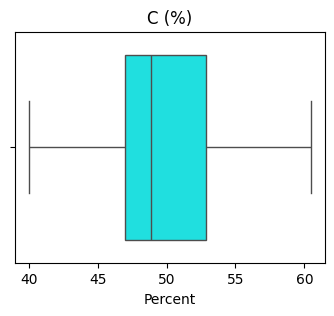

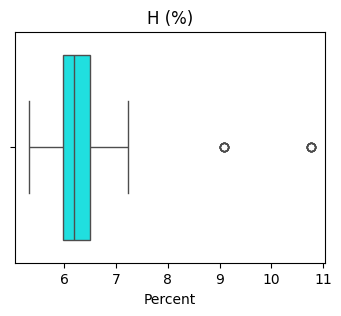

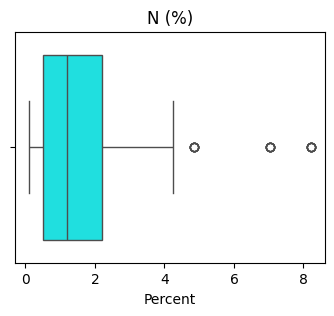

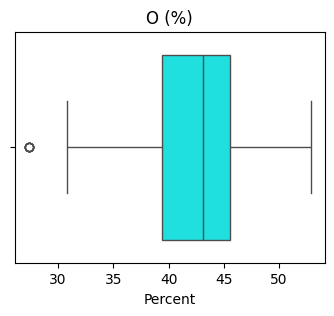

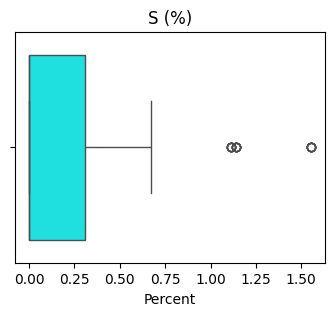

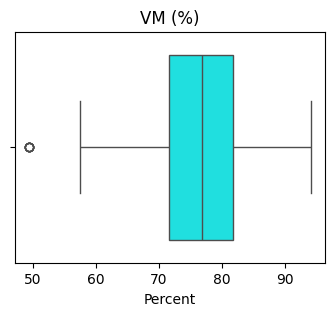

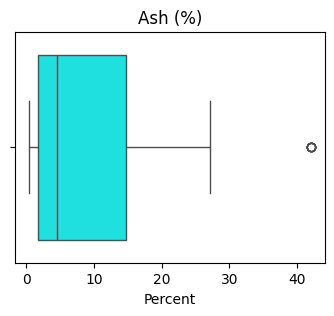

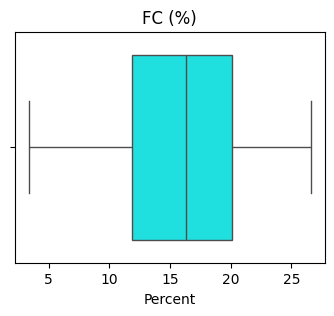

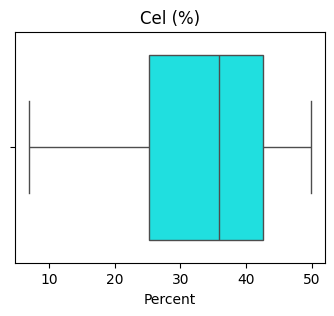

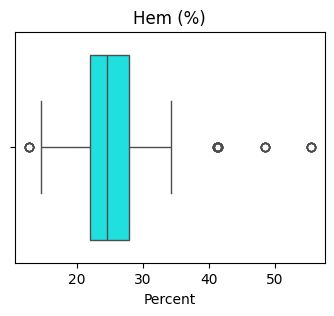

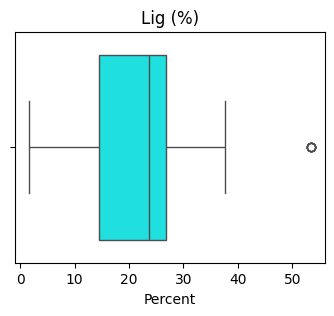

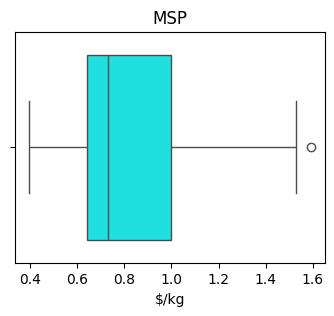

In [ ]:
# Plotting a boxplot for a specific numeric column
plt.figure(figsize=(4, 3))
sns.boxplot(x=df['C (%)'], color='cyan')
plt.title('C (%)')
plt.xlabel('Percent')
plt.show()

plt.figure(figsize=(4, 3))
sns.boxplot(x=df['H (%)'], color='cyan')
plt.title('H (%)')
plt.xlabel('Percent')
plt.show()

plt.figure(figsize=(4, 3))
sns.boxplot(x=df['N (%)'], color='cyan')
plt.title('N (%)')
plt.xlabel('Percent')
plt.show()

plt.figure(figsize=(4, 3))
sns.boxplot(x=df['O (%)'], color='cyan')
plt.title('O (%)')
plt.xlabel('Percent')
plt.show()

plt.figure(figsize=(4, 3))
sns.boxplot(x=df['S (%)'], color='cyan')
plt.title('S (%)')
plt.xlabel('Percent')
plt.show()

plt.figure(figsize=(4, 3))
sns.boxplot(x=df['VM (%)'], color='cyan')
plt.title('VM (%)')
plt.xlabel('Percent')
plt.show()

plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Ash (%)'], color='cyan')
plt.title('Ash (%)')
plt.xlabel('Percent')
plt.show()

plt.figure(figsize=(4, 3))
sns.boxplot(x=df['FC (%)'], color='cyan')
plt.title('FC (%)')
plt.xlabel('Percent')
plt.show()

plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Cel (%)'], color='cyan')
plt.title('Cel (%)')
plt.xlabel('Percent')
plt.show()

plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Hem (%)'], color='cyan')
plt.title('Hem (%)')
plt.xlabel('Percent')
plt.show()

plt.figure(figsize=(4, 3))
sns.boxplot(x=df['Lig (%)'], color='cyan')
plt.title('Lig (%)')
plt.xlabel('Percent')
plt.show()

plt.figure(figsize=(4,3))
sns.boxplot(x=df['MSP'], color='cyan')
plt.title('MSP')
plt.xlabel('$/kg')
plt.show()

Outliers can be identified from the dataset by targeting values that fall outside the whiskers of each boxplot, or by using Z-scoring to identify outliers outside of a threshhold based on a multiple of the standard deviation.

In this specific dataset, the numeric columns are the component percentages (features) and the MSP (target). The component percentages of a row together make up a given feedstock composition, so I believe their data should remain unchanged.

The MSP boxplot has an outlier that is barely outside the rightmost whisker, and I think it is not extreme enough to significantly skew the data.

In [ ]:
"""def remove_outliers_by_boxplot(data):
    Removes outliers from a dataset based on boxplot whiskers.

     Args:
        data (pandas.Series or numpy.ndarray): The input data.

    Returns:
        pandas.Series or numpy.ndarray: The data without outliers.


    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data >= lower_bound) & (data <= upper_bound)]"""

# Example usage:
# data = pd.Series([1, 2, 3, 4, 5, 100])  # 100 is a potential outlier
# cleaned_data = remove_outliers_by_boxplot(data)
# print(cleaned_data)

# Summary Statistics
---



In [ ]:
# Display summary statistics
summary_statistics = df.describe()
print(summary_statistics)

            C (%)       H (%)       N (%)       O (%)       S (%)      VM (%)  \
count  180.000000  180.000000  180.000000  180.000000  180.000000  180.000000   
mean    49.568108    6.426992    1.832344   41.943725    0.228832   75.549290   
std      4.054455    1.053328    1.969576    5.102580    0.396534    9.312775   
min     40.020000    5.320000    0.100000   27.360000    0.000000   49.357766   
25%     47.014626    5.980000    0.490884   39.366227    0.000000   71.700000   
50%     48.889915    6.180527    1.183134   43.107174    0.000000   76.937237   
75%     52.846674    6.500000    2.189781   45.557022    0.310034   81.797235   
max     60.460000   10.762332    8.210000   52.860000    1.552259   94.161220   

          Ash (%)      FC (%)     Cel (%)     Hem (%)     Lig (%)         MSP  
count  180.000000  180.000000  180.000000  180.000000  180.000000  180.000000  
mean     8.932959   15.517909   33.841149   26.517362   21.821477    0.791798  
std      9.954111    6.233776 

Apply one-hot encoding to convert the categorical variables into numerical format. As previously identified, the categorical variables are Plant Capacity (kg/hr) and Location.

In [ ]:
# Get the data types of each column
data_types = df.dtypes

# Print the results
print("Data types:\n")
print(data_types)

# Identify numeric columns (integer and float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (object)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("\nNumeric columns:", numeric_columns)
print("\nCategorical columns:", categorical_columns)

Data types:

C (%)                     float64
H (%)                     float64
N (%)                     float64
O (%)                     float64
S (%)                     float64
VM (%)                    float64
Ash (%)                   float64
FC (%)                    float64
Cel (%)                   float64
Hem (%)                   float64
Lig (%)                   float64
Location                   object
Plant capacity (kg/hr)     object
MSP                       float64
dtype: object

Numeric columns: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)', 'Cel (%)', 'Hem (%)', 'Lig (%)', 'MSP']

Categorical columns: ['Location', 'Plant capacity (kg/hr)']


In [ ]:
# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the encoded dataset
df_encoded.head()

,C (%),H (%),N (%),O (%),S (%),VM (%),Ash (%),FC (%),Cel (%),Hem (%),Lig (%),MSP,Location_China,Location_UK,Location_US,Plant capacity (kg/hr)_25000,Plant capacity (kg/hr)_50000
0,53.041259,6.390897,0.871969,39.366227,0.329647,82.070081,4.884097,13.045822,37.260000,14.620000,31.680000,0.64,False,False,True,True,False
1,52.846674,6.186584,0.436866,40.219842,0.310034,70.783562,12.000000,17.216438,31.300000,24.300000,14.100000,0.63,False,False,True,True,False
2,40.020000,6.010000,0.880000,52.860000,0.230000,72.294705,10.020831,17.684464,35.000000,27.500000,10.000000,0.69,False,False,True,True,False
3,45.739910,10.762332,7.036909,34.908589,1.552259,49.357766,42.020000,8.626970,35.000000,25.000000,26.500000,0.85,False,False,True,True,False
4,44.480000,6.280000,8.210000,40.490000,0.540000,77.497780,6.472025,16.030195,22.775726,55.419525,2.955145,1.20,False,False,True,True,False


# Check for Redundant Columns
---

In [ ]:
# Assuming your data is in a DataFrame named 'df'
duplicate_columns = df.columns[df.columns.duplicated()]

# To view the duplicate columns
print(duplicate_columns)

Index([], dtype='object')


There are no redundant columns in the dataset.

# Correlation and Heatmaps
---

Generate a correlation matrix and a heat map to examine correlations between numeric variables in the dataset.

In [ ]:
# Split the Data into X (features) and y (targets):
# Assuming 'target_column' is the name of your target variable

X = df_encoded.drop('MSP', axis=1)
y = df_encoded['MSP']

# Display the first few rows of X and y
X.head(), y.head()

(       C (%)      H (%)     N (%)      O (%)     S (%)     VM (%)    Ash (%)  \
 0  53.041259   6.390897  0.871969  39.366227  0.329647  82.070081   4.884097   
 1  52.846674   6.186584  0.436866  40.219842  0.310034  70.783562  12.000000   
 2  40.020000   6.010000  0.880000  52.860000  0.230000  72.294705  10.020831   
 3  45.739910  10.762332  7.036909  34.908589  1.552259  49.357766  42.020000   
 4  44.480000   6.280000  8.210000  40.490000  0.540000  77.497780   6.472025   
 
       FC (%)    Cel (%)    Hem (%)    Lig (%)  Location_China  Location_UK  \
 0  13.045822  37.260000  14.620000  31.680000           False        False   
 1  17.216438  31.300000  24.300000  14.100000           False        False   
 2  17.684464  35.000000  27.500000  10.000000           False        False   
 3   8.626970  35.000000  25.000000  26.500000           False        False   
 4  16.030195  22.775726  55.419525   2.955145           False        False   
 
    Location_US  Plant capacity (kg/

In [ ]:
# Assuming df_encoded is your dataset after one-hot encoding
encoded_columns = [col for col in df_encoded.columns if col not in df.columns]

# Print encoded columns to verify
print("One-hot encoded columns:")
print(encoded_columns)

One-hot encoded columns:
['Location_China', 'Location_UK', 'Location_US', 'Plant capacity (kg/hr)_25000', 'Plant capacity (kg/hr)_50000']


In [ ]:
# Exclude one-hot encoded columns from the dataset
df_no_encoding = df_encoded.drop(columns=encoded_columns)

# Alternatively, if you have the original dataframe before encoding, just use df

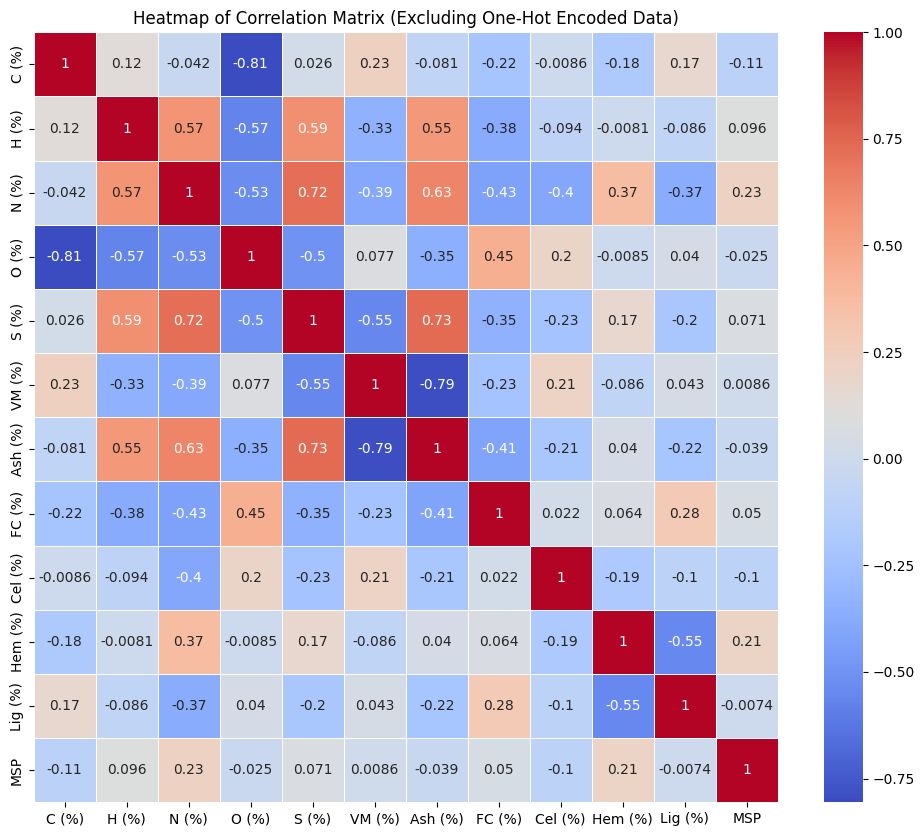

In [ ]:
# Plot a heatmap excluding the one-hot encoded columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_no_encoding.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix (Excluding One-Hot Encoded Data)')
plt.show()

Based on the heatmap that visually represents feature correlation, the content of Hemicellulose (Hem) and Nitrogen (N) have the greatest correlation with MSP.

The correlation with Hemicellulose makes sense, as high cellulose content is helpful to optimize yield, and I am surprised that Cellulose did not also have a similarly high correlation.

# Visualizing Data Relationships
---

Making scatter plots to visualize various relationships between several biofeed component contents and MSP:

Hemicellulose Content and MSP: 0.2071441441947086


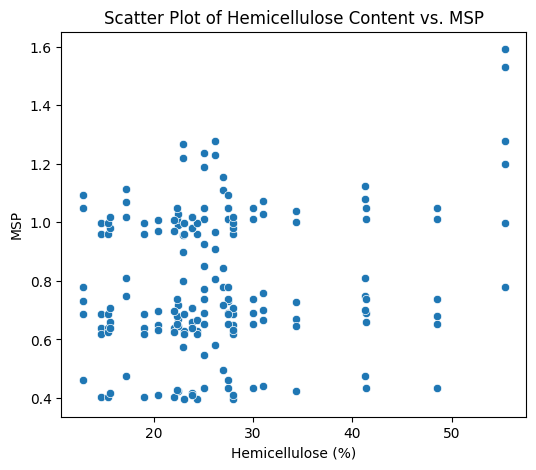

Nitrogen Content and MSP: 0.22873319972185635


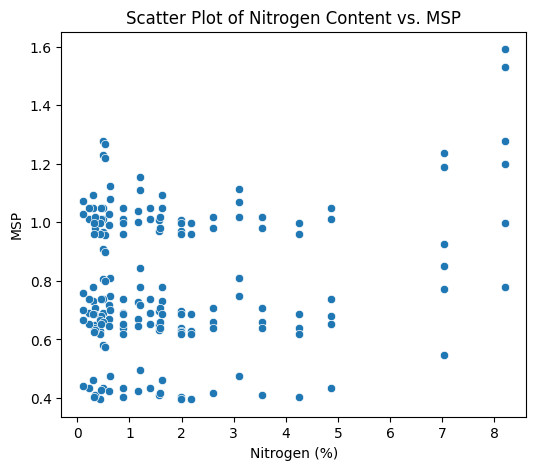

Cellulose Content and MSP: -0.10235668101657601


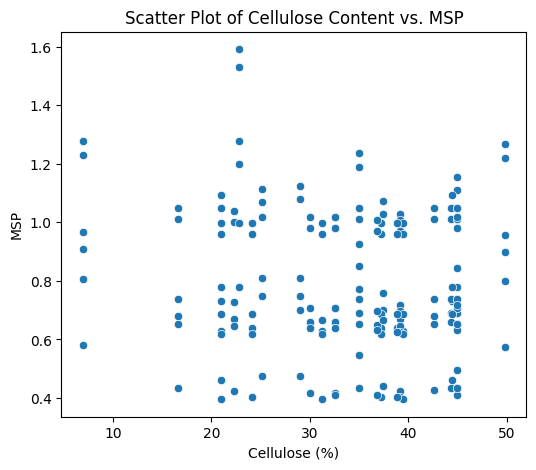

Ash Content and MSP: -0.03909543275418454


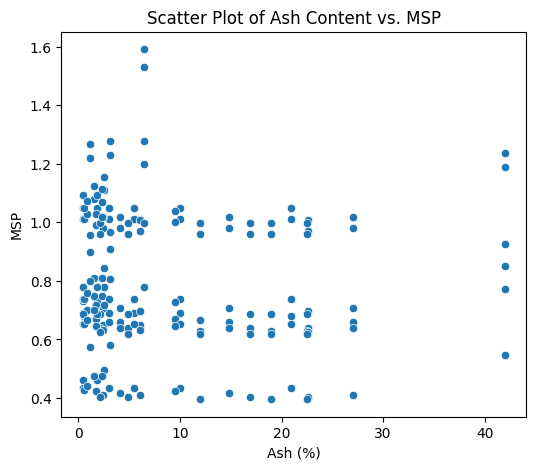

In [ ]:
# For Hemicellulose:
# Calculate the correlation coefficient
correlation = df["Hem (%)"].corr(df["MSP"])

# Print the correlation coefficient
print("Hemicellulose Content and MSP:", correlation)

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Hem (%)", y="MSP", data=df)
plt.title("Scatter Plot of Hemicellulose Content vs. MSP")
plt.xlabel("Hemicellulose (%)")
plt.ylabel("MSP")
plt.show()

# For Nitrogen:
correlation = df["N (%)"].corr(df["MSP"])

print("Nitrogen Content and MSP:", correlation)

plt.figure(figsize=(6, 5))
sns.scatterplot(x="N (%)", y="MSP", data=df)
plt.title("Scatter Plot of Nitrogen Content vs. MSP")
plt.xlabel("Nitrogen (%)")
plt.ylabel("MSP")
plt.show()

# For Cellulose:
correlation = df["Cel (%)"].corr(df["MSP"])

print("Cellulose Content and MSP:", correlation)

plt.figure(figsize=(6, 5))
sns.scatterplot(x="Cel (%)", y="MSP", data=df)
plt.title("Scatter Plot of Cellulose Content vs. MSP")
plt.xlabel("Cellulose (%)")
plt.ylabel("MSP")
plt.show()

# For Ash:
correlation = df["Ash (%)"].corr(df["MSP"])

print("Ash Content and MSP:", correlation)

plt.figure(figsize=(6, 5))
sns.scatterplot(x="Ash (%)", y="MSP", data=df)
plt.title("Scatter Plot of Ash Content vs. MSP")
plt.xlabel("Ash (%)")
plt.ylabel("MSP")
plt.show()

The conditions for optimal yield in fast pyrolysis include high cellulose content, low moisture, and low ash content. I selected Hemicellulose and Nitrogen because they have the greatest correlation coefficients (among the features) with MSP, and Ash and Cellulose because their values are pertinent to pyrolysis conditions (low and high content, respectively).

These scatter plots indicate that MSP has a weak positive correlation with Nitrogen and Hemicellulose content, and a very weak negative correlation to Cellulose and Ash content.

Making a bar plot to examine the relationship between the plant type (varied by capacity and location) and MSP:

In [ ]:
# Identify numeric columns (integer and float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (object)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("\nNumeric columns:", numeric_columns)
print("\nCategorical columns:", categorical_columns)


Numeric columns: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)', 'Cel (%)', 'Hem (%)', 'Lig (%)', 'MSP']

Categorical columns: ['Location', 'Plant capacity (kg/hr)']


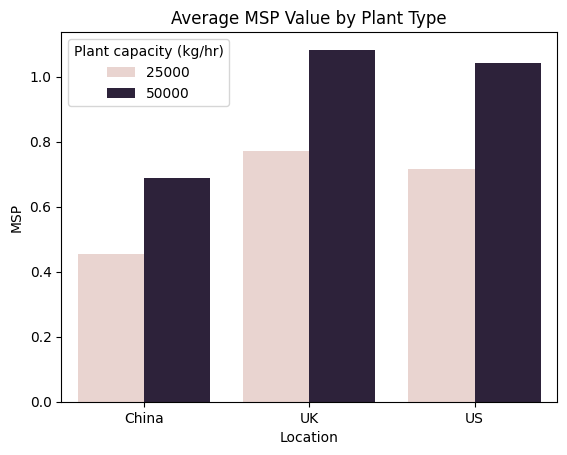

In [ ]:
# Calculate the mean of the target variable for each combination of categories
df_grouped = df.groupby(['Location', 'Plant capacity (kg/hr)'])['MSP'].mean().reset_index()

# Create a bar plot
sns.barplot(x='Location', y='MSP', hue='Plant capacity (kg/hr)', data=df_grouped)
plt.title('Average MSP Value by Plant Type')
plt.show()

The bar graph indicates that MSP is lowest from the Chinese plants, which could be attributed to differences in the region's biofeed composition, plant operations, or other economic factors.

Across all locations, MSP is greater from the 50k kg/hr capacity plants over the 25k kg/hr plants. This difference is not unexpected, as costs may scale up for the larger operations.

# Dealing with Multicollinearity
---

From the heatmap, feature pairs with the greatest correlation are C & O, VM & Ash, S & Ash, N & S, and N & Ash. I will drop the Ash (because it appears in several of these pairs and has low correlation to the target variable) and check if it reduces any distortion in the model.

In [ ]:
# Identify numeric columns (integer and float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (object)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("\nNumeric columns:", numeric_columns)
print("\nCategorical columns:", categorical_columns)


Numeric columns: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)', 'FC (%)', 'Cel (%)', 'Hem (%)', 'Lig (%)', 'MSP']

Categorical columns: ['Location', 'Plant capacity (kg/hr)']


In [ ]:
df.drop("Ash (%)", axis=1, inplace=True)

# Check if the column has been deleted
if "Ash (%)" not in df.columns:
    print("Column 'Ash (%)' has been deleted successfully.")
else:
    print("Column 'Ash (%)' still exists.")

Column 'Ash (%)' has been deleted successfully.


In [ ]:
# Identify numeric columns (integer and float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (object)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("\nNumeric columns:", numeric_columns)
print("\nCategorical columns:", categorical_columns)


Numeric columns: ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'FC (%)', 'Cel (%)', 'Hem (%)', 'Lig (%)', 'MSP']

Categorical columns: ['Location', 'Plant capacity (kg/hr)']


In [ ]:
# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the encoded dataset
df_encoded.head()

,C (%),H (%),N (%),O (%),S (%),VM (%),FC (%),Cel (%),Hem (%),Lig (%),MSP,Location_China,Location_UK,Location_US,Plant capacity (kg/hr)_25000,Plant capacity (kg/hr)_50000
0,53.041259,6.390897,0.871969,39.366227,0.329647,82.070081,13.045822,37.260000,14.620000,31.680000,0.64,False,False,True,True,False
1,52.846674,6.186584,0.436866,40.219842,0.310034,70.783562,17.216438,31.300000,24.300000,14.100000,0.63,False,False,True,True,False
2,40.020000,6.010000,0.880000,52.860000,0.230000,72.294705,17.684464,35.000000,27.500000,10.000000,0.69,False,False,True,True,False
3,45.739910,10.762332,7.036909,34.908589,1.552259,49.357766,8.626970,35.000000,25.000000,26.500000,0.85,False,False,True,True,False
4,44.480000,6.280000,8.210000,40.490000,0.540000,77.497780,16.030195,22.775726,55.419525,2.955145,1.20,False,False,True,True,False


In [ ]:
# Split the Data into X (features) and y (targets):
# Assuming 'target_column' is the name of your target variable

X = df_encoded.drop('MSP', axis=1)
y = df_encoded['MSP']

# Display the first few rows of X and y
X.head(), y.head()

(       C (%)      H (%)     N (%)      O (%)     S (%)     VM (%)     FC (%)  \
 0  53.041259   6.390897  0.871969  39.366227  0.329647  82.070081  13.045822   
 1  52.846674   6.186584  0.436866  40.219842  0.310034  70.783562  17.216438   
 2  40.020000   6.010000  0.880000  52.860000  0.230000  72.294705  17.684464   
 3  45.739910  10.762332  7.036909  34.908589  1.552259  49.357766   8.626970   
 4  44.480000   6.280000  8.210000  40.490000  0.540000  77.497780  16.030195   
 
      Cel (%)    Hem (%)    Lig (%)  Location_China  Location_UK  Location_US  \
 0  37.260000  14.620000  31.680000           False        False         True   
 1  31.300000  24.300000  14.100000           False        False         True   
 2  35.000000  27.500000  10.000000           False        False         True   
 3  35.000000  25.000000  26.500000           False        False         True   
 4  22.775726  55.419525   2.955145           False        False         True   
 
    Plant capacity (kg/h

In [ ]:
# Assuming df_encoded is your dataset after one-hot encoding
encoded_columns = [col for col in df_encoded.columns if col not in df.columns]

# Print encoded columns to verify
print("One-hot encoded columns:")
print(encoded_columns)

One-hot encoded columns:
['Location_China', 'Location_UK', 'Location_US', 'Plant capacity (kg/hr)_25000', 'Plant capacity (kg/hr)_50000']


In [ ]:
# Exclude one-hot encoded columns from the dataset
df_no_encoding = df_encoded.drop(columns=encoded_columns)

# Alternatively, if you have the original dataframe before encoding, just use df

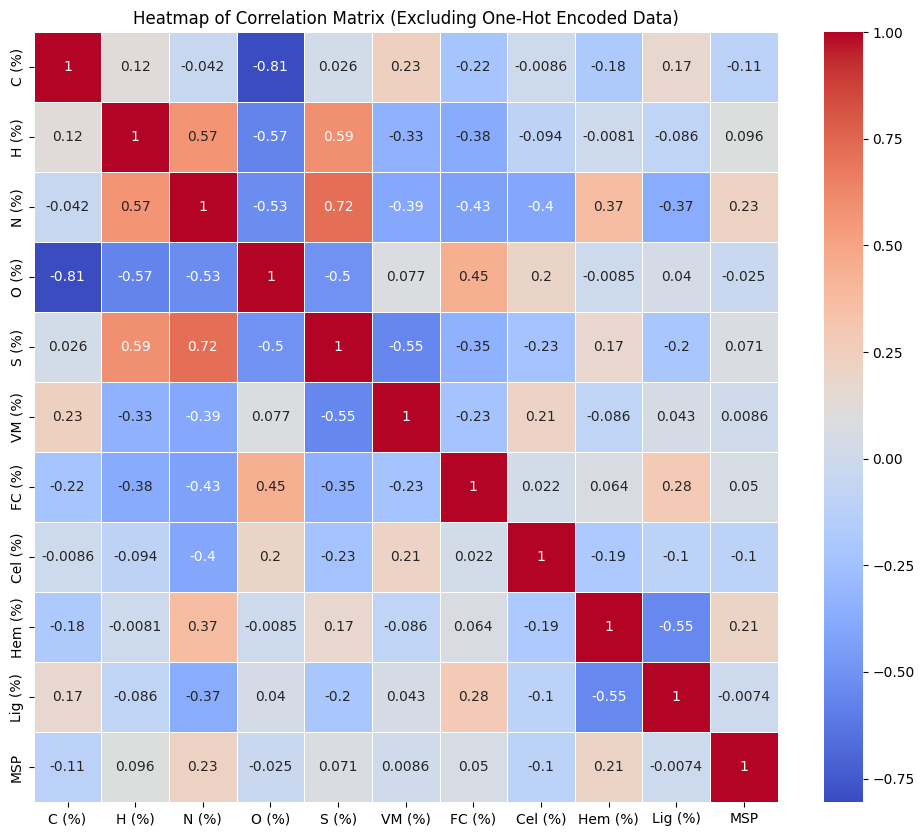

In [ ]:
# Plot a heatmap excluding the one-hot encoded columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_no_encoding.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix (Excluding One-Hot Encoded Data)')
plt.show()

Not much new information has been gleaned from removing Ash, so I'm going to remove Oxygen and Sulfur to see how that affects the other correlations.

In [ ]:
df.drop("O (%)", axis=1, inplace=True)

# Check if the column has been deleted
if "O (%)" not in df.columns:
    print("Column 'O (%)' has been deleted successfully.")
else:
    print("Column 'O (%)' still exists.")

Column 'O (%)' has been deleted successfully.


In [ ]:
df.drop("S (%)", axis=1, inplace=True)

# Check if the column has been deleted
if "S (%)" not in df.columns:
    print("Column 'S (%)' has been deleted successfully.")
else:
    print("Column 'S (%)' still exists.")

Column 'S (%)' has been deleted successfully.


In [ ]:
# Identify numeric columns (integer and float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (object)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("\nNumeric columns:", numeric_columns)
print("\nCategorical columns:", categorical_columns)


Numeric columns: ['C (%)', 'H (%)', 'N (%)', 'VM (%)', 'FC (%)', 'Cel (%)', 'Hem (%)', 'Lig (%)', 'MSP']

Categorical columns: ['Location', 'Plant capacity (kg/hr)']


In [ ]:
# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the encoded dataset
df_encoded.head()

,C (%),H (%),N (%),VM (%),FC (%),Cel (%),Hem (%),Lig (%),MSP,Location_China,Location_UK,Location_US,Plant capacity (kg/hr)_25000,Plant capacity (kg/hr)_50000
0,53.041259,6.390897,0.871969,82.070081,13.045822,37.260000,14.620000,31.680000,0.64,False,False,True,True,False
1,52.846674,6.186584,0.436866,70.783562,17.216438,31.300000,24.300000,14.100000,0.63,False,False,True,True,False
2,40.020000,6.010000,0.880000,72.294705,17.684464,35.000000,27.500000,10.000000,0.69,False,False,True,True,False
3,45.739910,10.762332,7.036909,49.357766,8.626970,35.000000,25.000000,26.500000,0.85,False,False,True,True,False
4,44.480000,6.280000,8.210000,77.497780,16.030195,22.775726,55.419525,2.955145,1.20,False,False,True,True,False


In [ ]:
# Split the Data into X (features) and y (targets):
# Assuming 'target_column' is the name of your target variable

X = df_encoded.drop('MSP', axis=1)
y = df_encoded['MSP']

# Display the first few rows of X and y
X.head(), y.head()

(       C (%)      H (%)     N (%)     VM (%)     FC (%)    Cel (%)    Hem (%)  \
 0  53.041259   6.390897  0.871969  82.070081  13.045822  37.260000  14.620000   
 1  52.846674   6.186584  0.436866  70.783562  17.216438  31.300000  24.300000   
 2  40.020000   6.010000  0.880000  72.294705  17.684464  35.000000  27.500000   
 3  45.739910  10.762332  7.036909  49.357766   8.626970  35.000000  25.000000   
 4  44.480000   6.280000  8.210000  77.497780  16.030195  22.775726  55.419525   
 
      Lig (%)  Location_China  Location_UK  Location_US  \
 0  31.680000           False        False         True   
 1  14.100000           False        False         True   
 2  10.000000           False        False         True   
 3  26.500000           False        False         True   
 4   2.955145           False        False         True   
 
    Plant capacity (kg/hr)_25000  Plant capacity (kg/hr)_50000  
 0                          True                         False  
 1                  

In [ ]:
# Assuming df_encoded is your dataset after one-hot encoding
encoded_columns = [col for col in df_encoded.columns if col not in df.columns]

# Print encoded columns to verify
print("One-hot encoded columns:")
print(encoded_columns)

One-hot encoded columns:
['Location_China', 'Location_UK', 'Location_US', 'Plant capacity (kg/hr)_25000', 'Plant capacity (kg/hr)_50000']


In [ ]:
# Exclude one-hot encoded columns from the dataset
df_no_encoding = df_encoded.drop(columns=encoded_columns)

# Alternatively, if you have the original dataframe before encoding, just use df

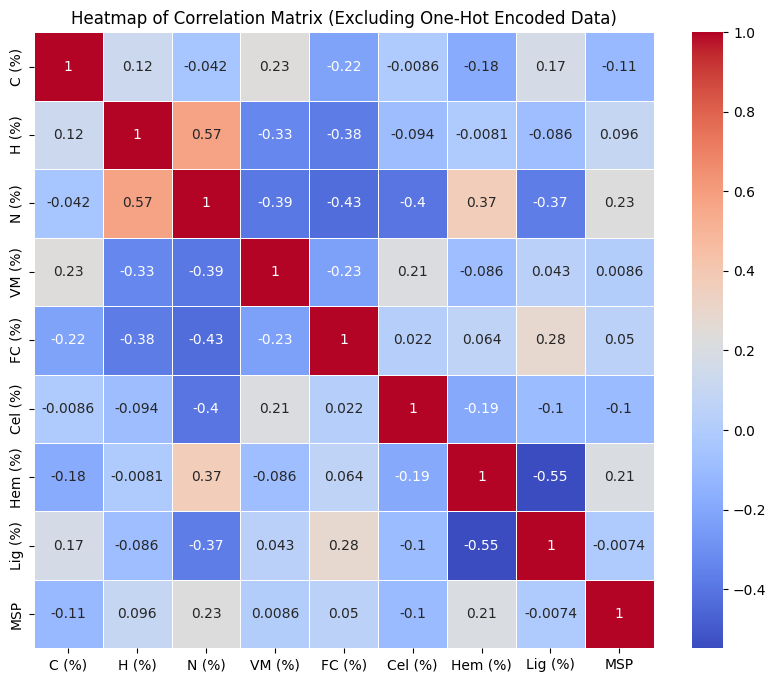

In [ ]:
# Plot a heatmap excluding the one-hot encoded columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_no_encoding.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix (Excluding One-Hot Encoded Data)')
plt.show()

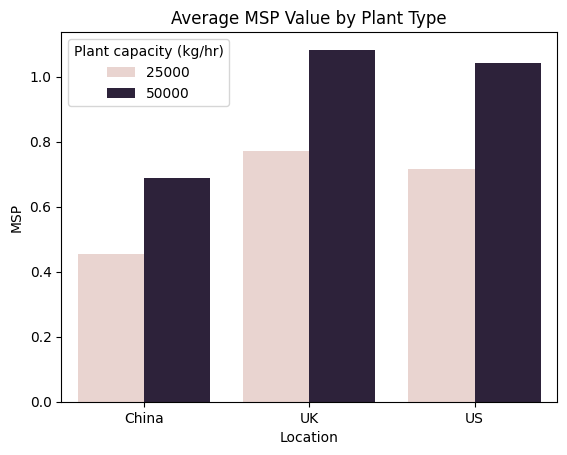

In [ ]:
# Calculate the mean of the target variable for each combination of categories
df_grouped = df.groupby(['Location', 'Plant capacity (kg/hr)'])['MSP'].mean().reset_index()

# Create a bar plot
sns.barplot(x='Location', y='MSP', hue='Plant capacity (kg/hr)', data=df_grouped)
plt.title('Average MSP Value by Plant Type')
plt.show()

After removing several feature variables to reduce multicollinearity, the resulting heatmap indicates that the there has been little to no change to correlation between the features and target variable.

# Final Thoughts
---

It seems that the most distinct variable to determine the MSP of SAF is the type of plant, specifically plants in China vs in US and UK. Biofeed composition features seem to have little direct correlation to MSP within the context of this dataset.

Other features that may be key to analyzing the MSP of SAF include temperature or a list of biofeed compounds rather than the elemental compnent percentages of the feed. Some compounds may contain the same percentages of elements like carbon and hydrogen but they could have very different effects on SAF due to different molecular structures.